In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [5]:
df.Sequence = df.Sequence.str.split(",")
df.head()

,Id,Sequence
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108..."
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9..."
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12..."
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331..."
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321..."


In [6]:
def conv(a):
    return list(map(int, a))
df['Sequence'] = df.Sequence.apply(conv)
df.head()

,Id,Sequence
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108..."
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9..."
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12..."
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331..."
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321..."


In [7]:
df['Length'] = df.Sequence.app ly(len)
df.head()

,Id,Sequence,Length
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12


In [8]:
def inc(a):
    for i in range(len(a)-1):
        if a[i+1] < a[i]:
            return False
    return True
df['Increasing'] = df.Sequence.apply(inc)
df.head()

,Id,Sequence,Length,Increasing
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,True
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,False
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,True
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,True
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,True


In [9]:
nums = []
for i in range(len(df.Sequence)):
    nums += df.Sequence[i]
nums = pd.Series(nums)
nums.head()

0       1
1       3
2      13
3      87
4    1053
dtype: object

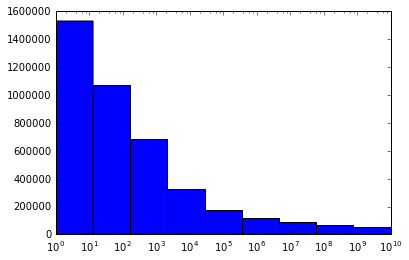

In [10]:
plt.hist(nums, bins=10**np.linspace(0, 10, num=10))
plt.xscale('log')
plt.show()

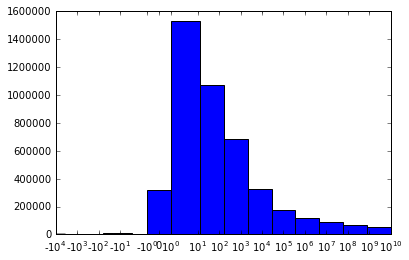

In [11]:
plt.hist(nums, bins= (-1*(10**np.linspace(4,0,num=10))).tolist() + (10**np.linspace(0, 10, num=10)).tolist())
plt.xscale('symlog')
plt.show()

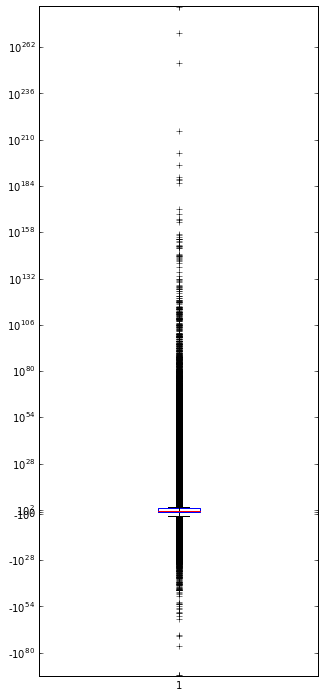

In [12]:
plt.figure(figsize=(5,12))
plt.boxplot(nums)
plt.yscale('symlog', linthreshy = 10**2)
plt.show()